## Problem Metadata 
DO NOT DELETE (JSON Block; the metadata and course context MUST be in the first cell)

```json
{
    "problem_title": "electricHeatingWaterVaporConstantPressure",
    "author": "tschutzius",
    "year": "Fa25",
    "difficulty_tags": ["easy"],
    "topic": "Closed Systems",
    "lecture_reference": {
        "lecture_id": "1_3375c5yj",
        "subtopics": [
            {
              "key": "Fa25-L4c-1.0",
              "title": "Electric heating of water vapor at constant pressure",
            }
        ]
    },
    "book_reference": {
          "chapter_number": 4,
          "title": "Energy Analysis of Closed Systems",
        "sections": [
            "Moving Boundary Work",
            "Energy Balance for Closed Systems",
        ]
    },
    "notes": ""
}
```

## 1. Problem Statement
A piston cylinder contains 25 g of saturated water vapor at 300 kPa. The piston is kept at constant pressure while heat is transferred out. The cylinder contains a resistor inside of it while a voltage of 120 V is applied and 0.2 A of current passes through it for 5 min. 

**Goal**: 
* Determine the final temperature of the steam
* Determine $(u_2 + p_2 v_2) - (u_1 + p_1 v_1)$

## 2. Schematic
Draw a schematic of a piston cylinder. Show that electrical work is transferred into the piston and heat is transferred out of it. 

## 3. Assumptions and Approximations
* Use `pyCalor` to determine water properties. 
* Neglect changes in kinetic and potential energy.
* Closed system (no mass in or out)

## 4. Physical Laws and Governing Equations

Conservation of energy: 
$$\Delta E_\text{CV} = E_\text{in} - E_\text{out} $$

$$\Delta U + \Delta KE + \Delta PE = (W_\text{in} + Q_\text{in}) - (W_\text{out} + Q_\text{out})  $$

Neglect changes in kinetic and potential energy:
$$\Delta U = (W_\text{in}) - (W_\text{out} + Q_\text{out}) $$

$$ W_\text{out} = p_1 (V_2 - V_1) $$

$$ W_\text{out} = p_1 m (v_2 - v_1) $$

$$ W_\text{in} = \text{V} I \Delta t $$

Combining yields:

$$m (u_2 - u_1) = \text{V} I \Delta t  - p_1 m (v_2 - v_1)  - Q_\text{out} $$

Rearranging:

$$m \left[ \left(u_2 + p_1 v_2\right) - \left( u_1 + p_1 v_1 \right) \right] = \text{V} I \Delta t   - Q_\text{out} $$

Since $p_2 = p_1$, we have:

$$m \left[ \left(u_2 + p_2 v_2\right) - \left( u_1 + p_1 v_1 \right) \right] = \text{V} I \Delta t   - Q_\text{out} $$

The definition of enthalpy is:

$$ h = u + p v$$

Therefore,

$$m \left[ h_2 - h_1 \right] = \text{V} I \Delta t   - Q_\text{out} $$

$$h_2  = \text{V} I \Delta t /m   - Q_\text{out} / m + h_1$$

We need to determine the specific volumes at state 2 and state 1.

In [1]:
## 5. Properties (Code Cell)

!pip install pyCalor
from pyCalor import thermo as th

# state 1
m_kg = 25/1000
p1_kPa = 300
x1 = 1

st1 = th.state('water', p = (p1_kPa,'kpa'), x = x1, name='1')

# state 2
p2_kPa = p1_kPa

# inputs
Qout_kJ = 3.7
I_A = 0.2
Volt_V = 120
dt_min = 5

  Using cached pycalor-1.0.21-py3-none-any.whl.metadata (4.8 kB)
  Using cached coolprop-7.1.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (282 bytes)
  Using cached igraph-0.11.9-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
  Using cached texttable-1.7.0-py2.py3-none-any.whl.metadata (9.8 kB)
Using cached pycalor-1.0.21-py3-none-any.whl (24 kB)
Using cached coolprop-7.1.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (15.1 MB)
Using cached igraph-0.11.9-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.4 MB)
Using cached texttable-1.7.0-py2.py3-none-any.whl (10 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [pyCalor]m2/4 [igraph]p]


7.2
3009.1826302959594
T2: 270.33 deg C


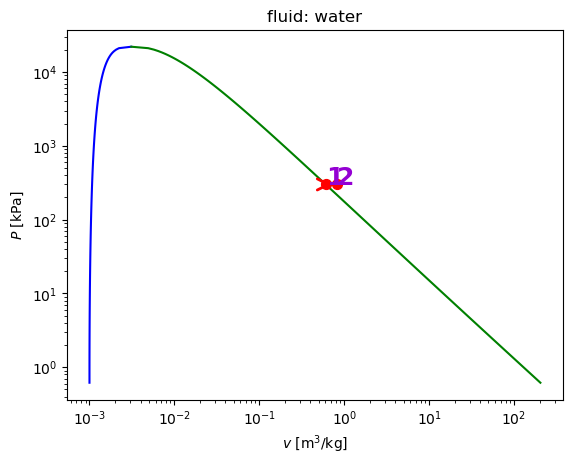

u2 + p2*v2 - (u1 + p1*v1) = 284.30 kJ/kg
h2 - h1 = 284.30 kJ/kg


In [7]:
# 6 Calculations (Code Cell)
Win_e_J = I_A*Volt_V*(dt_min*60)
Win_e_kJ = Win_e_J/1e3; print(Win_e_kJ)

h2_J = (I_A*Volt_V*(dt_min*60)/m_kg) - (Qout_kJ*1e3) + st1.h*1e3
h2_kJ = h2_J/1000; print(h2_kJ)

# determine state 2 using h2
st2 = th.state('water', p = (p2_kPa,'kpa'), h = h2_kJ, name='2')

# by knowing state 2, we can determine T2
T2_K = st2.T
T2_C = T2_K - 273.15
print('T2: {0:1.2f} deg C'.format(T2_C))

# define the process using pyCalor
pr = th.process([(st1,st2)])

# plot the process on a pressure-specific volume diagram
pr.plot('pv');

# determine u2 + p2*v2 - (u1 + p1*v1)
h2 = st2.u + st2.v*st2.p
h1 = st1.u + st1.v*st1.p

answer = h2 - h1
print('u2 + p2*v2 - (u1 + p1*v1) = {0:1.2f} kJ/kg'.format(answer))

# st2.h - st1.h #kJ/kg
print('h2 - h1 = {0:1.2f} kJ/kg'.format(st2.h - st1.h))

## 7. Summary and Reasoning
We determined the temperature of the steam at state 2. We also compared $u_2 + p_2v_2 - (u_1 + p_1v_1)$ with $h_2 - h_1$ and found that they were the same.  